In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import july
from july.utils import date_range
import calplot

In [2]:
#read the data
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')
df.shape

(2823, 25)

In [3]:
#change the type of data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
#Set orderdate as index
df.set_index('ORDERDATE', inplace = True)

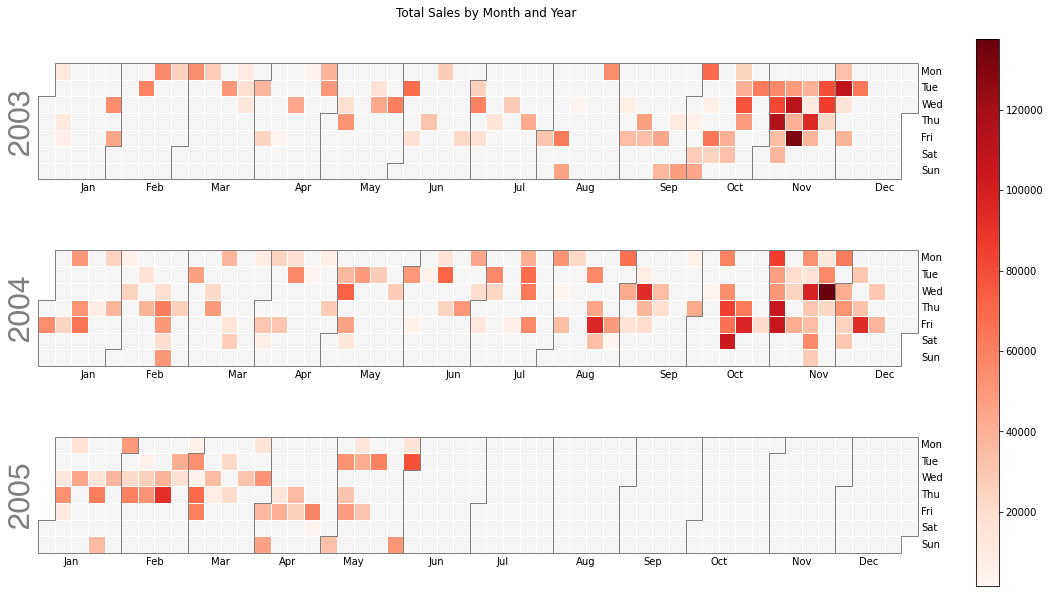

In [4]:
pl1 = calplot.calplot(data = df['SALES'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Total Sales by Month and Year")

In [5]:
products = set(list(df['PRODUCTLINE']))

In [6]:
def draw_calplot(prod):
   data_subset = df[df['PRODUCTLINE'] == prod]
   plt = calplot.calplot(data = data_subset['SALES'], how = 'sum', figsize = (16,8), suptitle = 'Total Sales for teh Product '+prod) 

In [7]:
x = interact(draw_calplot, prod = products) 

interactive(children=(Dropdown(description='prod', options=('Motorcycles', 'Ships', 'Planes', 'Classic Cars', …

<AxesSubplot:title={'center':'Total Sales'}>

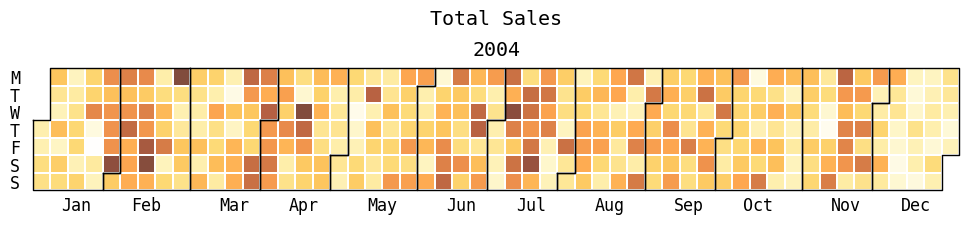

In [8]:
dates = date_range("2004-01-01", "2004-12-31")
july.heatmap( dates, data =df['SALES'], title='Total Sales', cmap="golden", month_grid=True, horizontal = True)

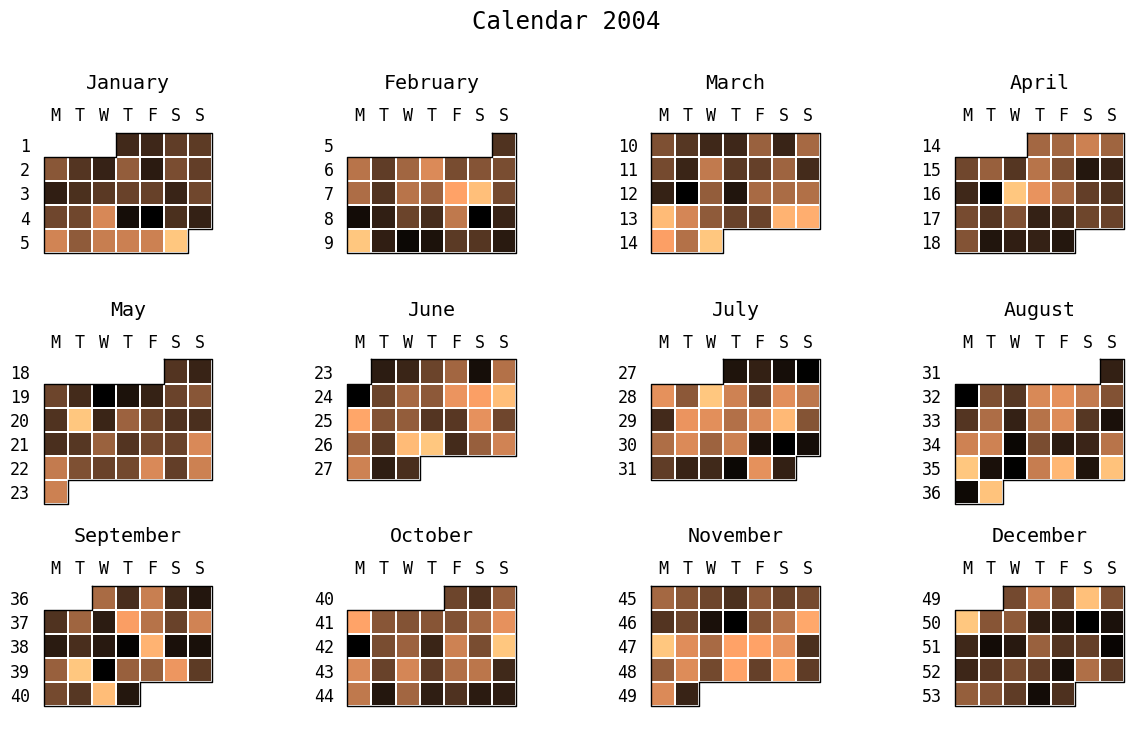

In [9]:
july.calendar_plot(dates, df['SALES'], cmap = 'copper');

In [145]:
import json
  
# Opening JSON file
f = open('response_1653133305885.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [146]:
print(data['data'][0])

{'tdescription': 'free', 'tmetadata': {}, 'tname': 'free', 'ttype': 'Instantaneous', 'tunit': '', 'mperiod': 1, 'mtransactiontime': '2020-12-07 10:00:32.295+0000', 'mvalidtime': '2022-05-21 07:59:47.000+0000', 'mvalue': 0, 'sactive': True, 'savailable': True, 'scode': '001bc506701005d5', 'scoordinate': {'x': 11.345608, 'y': 46.495061, 'srid': 4326}, 'smetadata': {'id2': 'C-S9', 'group': 'area viale Druso', 'municipality': 'Bolzano - Bozen'}, 'sname': 'incrocio viale Venezia - viale Druso', 'sorigin': 'AXIANS', 'stype': 'ParkingSensor'}


In [147]:
# Opening JSON file
f = open('response_1653134220170.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [148]:
data['data'][0]

{'evcategory': 'A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167)',
 'evend': '2019-01-20 18:00:00.000+0000',
 'evmetadata': {'id': 372146,
  'idcorsia': 'Intera carreggiata',
  'metro_fine': 138000,
  'iddirezione': 'Sud',
  'idtipoevento': 24,
  'metro_inizio': 168000,
  'fascia_oraria': False,
  'idsottotipoevento': 181},
 'evname': '372146',
 'evorigin': 'A22',
 'evseriesuuid': 'f4f4a18d-ffb8-5338-a252-453530984589',
 'evstart': '2019-01-20 08:00:00.000+0000',
 'evtransactiontime': '2022-02-08 17:33:43.587+0000',
 'evuuid': 'd9424b4e-6c73-5c58-ab8a-5423feb1b631',
 'evlgeometry': {'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}},
  'bbox': [11.00300422, 45.8336233, 11.10997887, 46.06492389],
  'type': 'MultiPoint',
  'coordinates': [[11.10997887, 46.06492389], [11.00300422, 45.8336233]]}}

In [149]:
list_evcategory = []
list_evstart = []
list_evtransactiontime = []
list_event = []
list_id = []

for el in data['data']:
    list_evcategory.append(el['evcategory'])
    list_evstart.append(el['evstart'])
    list_evtransactiontime.append(el['evtransactiontime'])
    list_event.append(1)
    list_id.append(el['evmetadata']['id'])

In [150]:
df = pd.DataFrame(list(zip(list_id, list_evcategory, list_evstart, list_evtransactiontime, list_event)),
               columns =['id', 'evcategory', 'evstart', 'evtransactiontime', 'event'])

In [151]:
df['evstart'] = pd.to_datetime(df['evstart'])
df['evtransactiontime'] = pd.to_datetime(df['evtransactiontime'])

In [172]:
len(df['evcategory'].unique())

15

In [153]:
import warnings
warnings.filterwarnings('ignore')

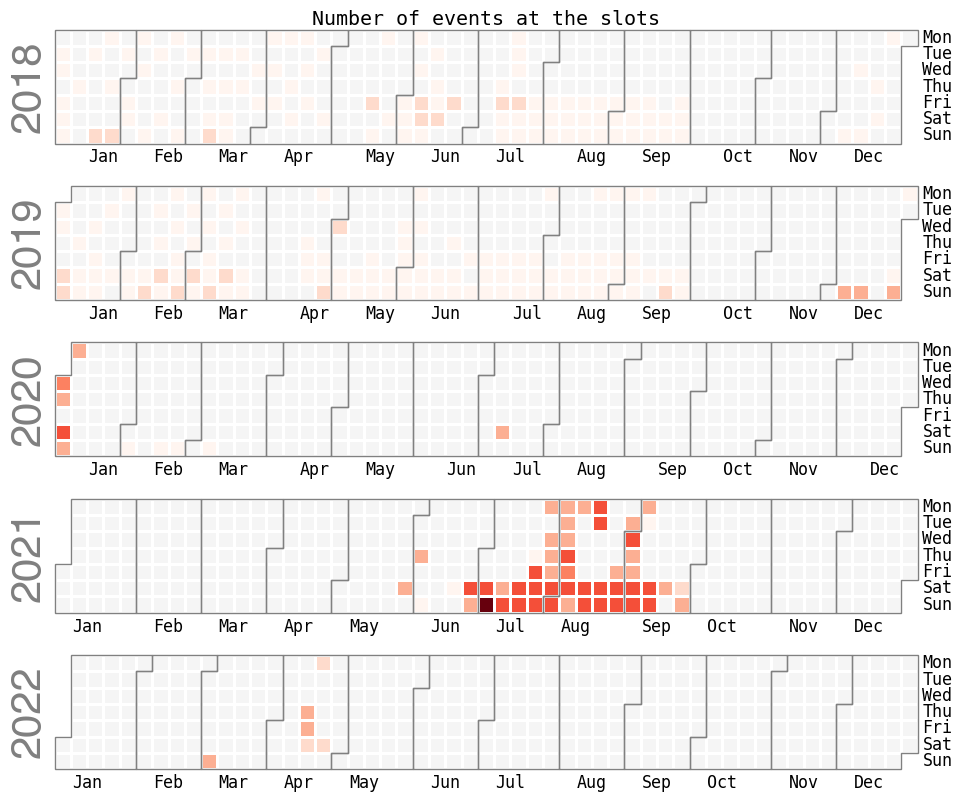

In [154]:
#Set orderdate as index
df.set_index('evstart', inplace = True)
pl1 = calplot.calplot(data = df['event'],how = 'sum', cmap = 'Reds', figsize = (16, 8), suptitle = "Number of events at the slots")

In [155]:
products = set(list(df['evcategory']))
def draw_calplot(prod):
    data_subset = df[df['evcategory'] == prod]
    plt = calplot.calplot(data = data_subset['event'], how = 'sum', figsize = (16,8), suptitle = 'Total '+prod) 

In [156]:
x = interact(draw_calplot, prod = products) 

interactive(children=(Dropdown(description='prod', options=('A22:BrennerLEC_BrennerLec B3 II 110 T1 (km 77-100…

In [157]:
df.head()

,id,evcategory,evtransactiontime,event
evstart,,,,
2019-01-20 08:00:00+00:00,372146,A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167),2022-02-08 17:33:43.587000+00:00,1
2019-04-19 06:00:00+00:00,380118,A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167),2022-02-08 17:34:25.974000+00:00,1
2019-07-07 08:45:00+00:00,391966,A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167),2022-02-08 17:35:16.475000+00:00,1
2019-07-20 07:00:00+00:00,391972,A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167),2022-02-08 17:35:16.025000+00:00,1
2019-12-29 14:45:00+00:00,415873,A22:BrennerLEC_BrennerLec B3 100 T3 (km 138-167),2022-02-08 17:37:07.277000+00:00,1


<AxesSubplot:title={'center':'Id of events'}>

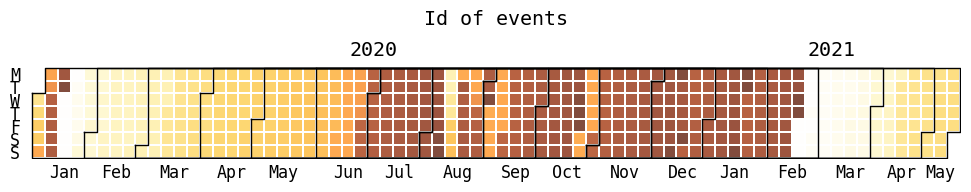

In [171]:
dates = date_range("2020-01-01", "2021-12-31")
july.heatmap( dates, data =df['id'], title='Id of events', cmap="golden", month_grid=True, horizontal = True)

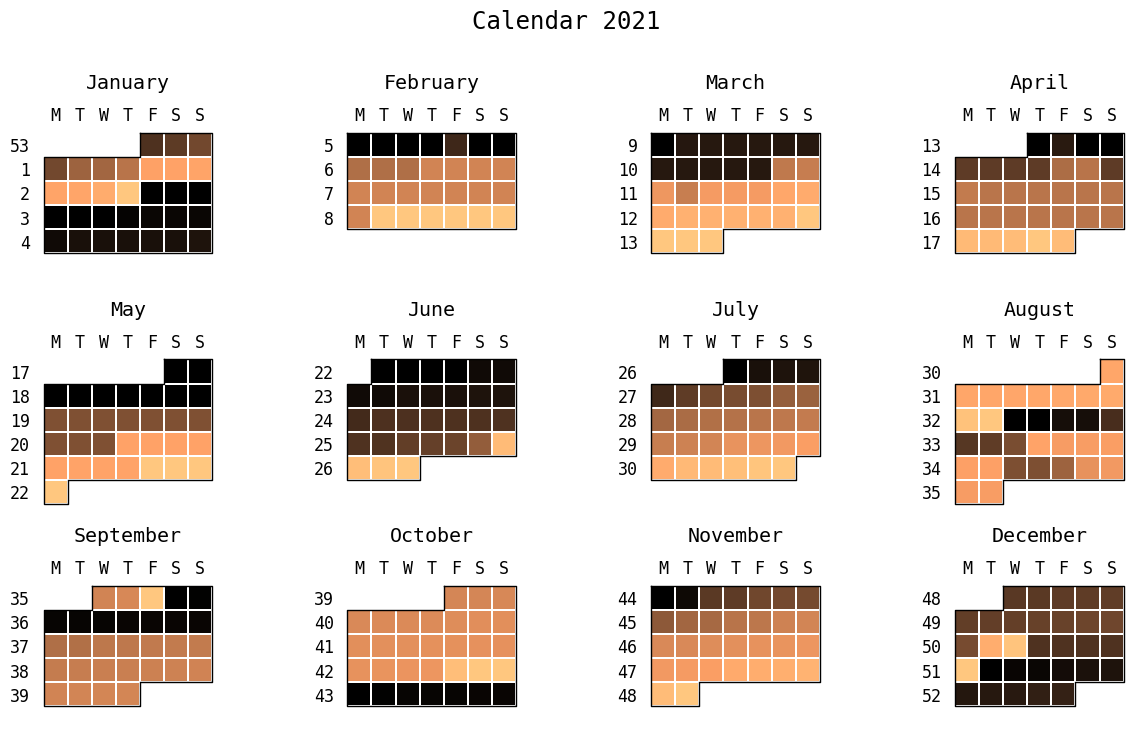

In [170]:
dates = date_range("2021-01-01", "2021-12-31")
july.calendar_plot(dates, df['id'], cmap = 'copper');

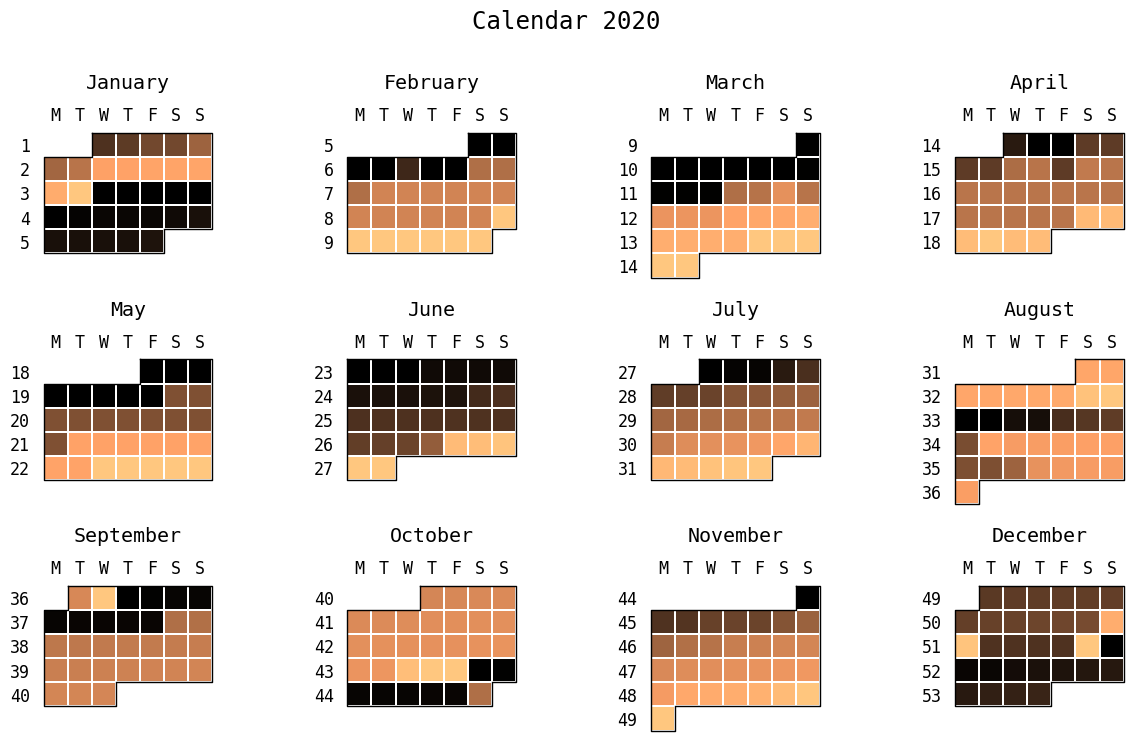

In [169]:
dates = date_range("2020-01-01", "2020-12-31")
july.calendar_plot(dates, df['id'], cmap = 'copper');